# Solving for influence of RC snubber circuit

In [323]:
#importing all required modules
%matplotlib inline 
import numpy as np
from scipy.integrate import odeint, ode, cumtrapz
import matplotlib.pyplot as plt
from math import pi, sin, atan
import seaborn as sns

Auxiliary variables definition

In [228]:
# RMS value of voltage
u = 230 

#time vector
t = np.linspace(0,0.3, 1000)

#frequency & angular frequency
f = 50
omega = 2 * pi * f

#Resitance
R = 5

#Inductance
L = 0.1
XL = 2*pi*f*L

#Phase angle
phi=atan(XL/R)

#closing angle [rad]
alpha = 0

## DC voltage

Case 1: closing of the circuit

In [326]:
def di(x,t):
    #for this function i = p
    #initial condition
    p = x[0]
    #di function
    dp = 1/L*(u - R*p)
    
    return dp

# initial condition
x0 = 0

# current
idc = odeint(di, x0, t)

# inductor voltage
uLdc = u - R*idc

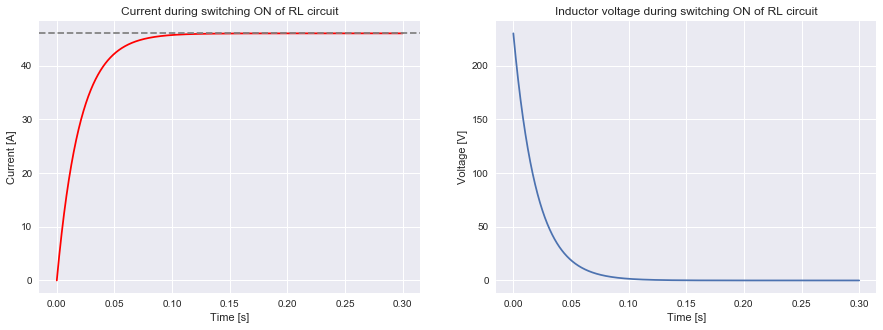

In [339]:
plt.figure(figsize=(15,5))

ax = plt.subplot(121)
ax.plot(t, idc, color='red')
ax.axhline(u/R, color='grey', linestyle='--')
ax.set_title("Current during switching ON of RL circuit")
ax.set_xlabel('Time [s]')
ax.set_ylabel('Current [A]')

ax2 = plt.subplot(122)
ax2.plot(t, uLdc)
ax2.set_title("Inductor voltage during switching ON of RL circuit")
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Voltage [V]');

Case 2: Disconnection of voltage

In [340]:
# disconnection

def di(x,t):
    #for this function i = p
    #initial condition
    p = x[0]
    #di function
    dp = 1/L*( - R*p)
    
    return dp

# initial condition
x0 = u/R

# current
idc2 = odeint(di, x0, t)

# inductor voltage
uLdc2 =  - R*idc2

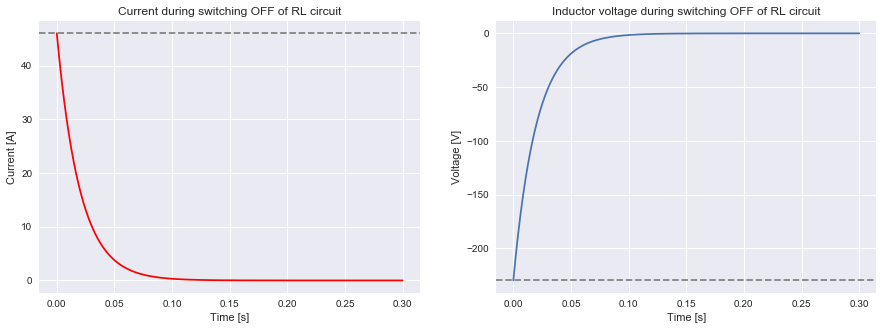

In [343]:
plt.figure(figsize=(15,5))

ax = plt.subplot(121)
ax.plot(t, idc2, color='red')
ax.axhline(u/R, color='grey', linestyle='--')
ax.set_title("Current during switching OFF of RL circuit")
ax.set_xlabel('Time [s]')
ax.set_ylabel('Current [A]')

ax2 = plt.subplot(122)
ax2.plot(t, uLdc2)
ax2.axhline(-u, color='grey', linestyle='--')
ax2.set_title("Inductor voltage during switching OFF of RL circuit")
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Voltage [V]');

Case 3: Disconnection with RC snubber circuit

In [348]:
#Capacitance (worth to consider 0.01 - two inertia or 0.001 - oscillator)
C = 0.007

# additional resistor
R2 = 0.1

#definition of the function dp/dt

def di(y,t):
    #x = i, p = di/dt
    x, p = y[0], y[1]
    
    dx = p
    dp = 1/L*(-(R+R2)*p-(1/C)*x)
    
    return [dx, dp]

#initial capacitor voltage
uc0 = 0

# initial condition for current and di/dt
y0 = [u/R, 0]

# vector of solutions
I = odeint(di, y0, t)

# current
idc3 = I[:,0]

# current derivative
di = I[:,1]

# inductor voltage
uLdc3 = L*di

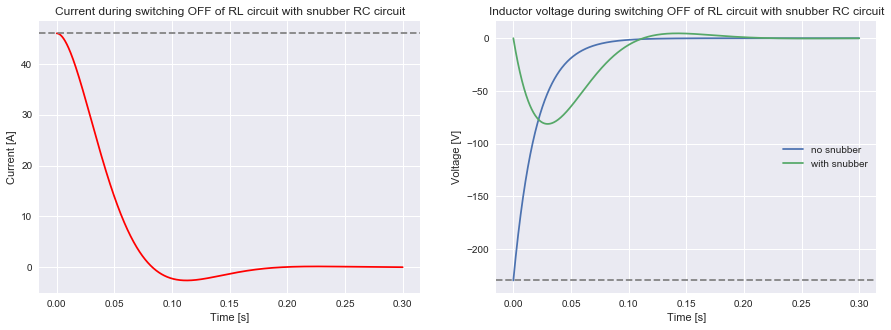

In [349]:
plt.figure(figsize=(15,5))

ax = plt.subplot(121)
ax.plot(t, idc3, color='red')
ax.axhline(u/R, color='grey', linestyle='--')
ax.set_title("Current during switching OFF of RL circuit with snubber RC circuit")
ax.set_xlabel('Time [s]')
ax.set_ylabel('Current [A]')

ax2 = plt.subplot(122)
ax2.plot(t, uLdc2, label='no snubber')
ax2.plot(t, uLdc3, label='with snubber')
ax2.axhline(-u, color='grey', linestyle='--')
ax2.legend()
ax2.set_title("Inductor voltage during switching OFF of RL circuit with snubber RC circuit")
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Voltage [V]');

## AC voltage
Case 1: switching on 

In [229]:
ua = [np.sqrt(2)*u*sin(omega*k + alpha) for k in t]

In [350]:
def di(x,t):
    #for this function i = p
    #initial condition
    p = x[0]
    #di function
    dp = 1/L*(np.sqrt(2)*u*sin(omega*t + alpha) - R*p)
    
    return dp

#initial state
x0 = 0

# circuit current
ia = odeint(di, x0, t)

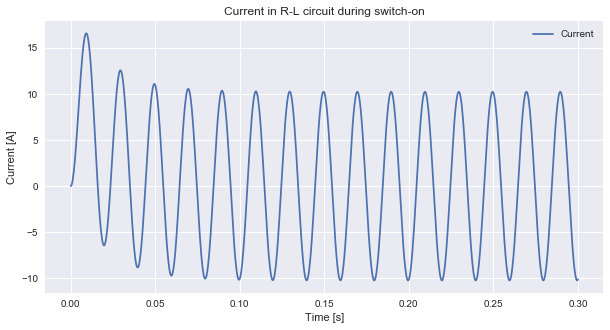

In [351]:
plt.figure(figsize=(10,5))
plt.plot(t,ia, label="Current")
plt.ylabel("Current [A]")
plt.xlabel("Time [s]")
plt.title("Current in R-L circuit during switch-on")
plt.legend();

In [352]:
# resistor voltage
uR = R*ia

# line voltage 
U = np.array([np.sqrt(2)*u*sin(omega*k + alpha) for k in t])
# inductor voltage
uL = [U[k] - uR[k] for k in range(len(U))]

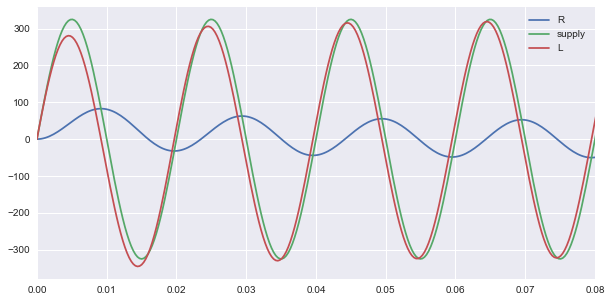

In [355]:
plt.figure(figsize=(10,5))
plt.plot(t, uR, label='R')
plt.plot(t, U, label='supply')
plt.plot(t, uL, label='L')
plt.xlim(0, 0.08)
plt.legend();